In [1]:
%matplotlib inline

intro
link to binder, website, intro, topics

- string splitting
- test with plotting
- keep mechanics

In [2]:
import numpy as np
# link to numpy tutorial TODO
import matplotlib.pyplot as plt
# link TODO
import re
# description, link to regexr TODO

In [3]:
x = "5d6"
x.split('d')

['5', '6']

In [4]:
def simple_roll(dice):
    '''docstring'''
    number, sides = dice.split('d')
    number = int(number)
    sides = int(sides)
    rolls = np.random.randint(1,sides+1, size=number)
    return rolls
    

In [5]:
simple_roll('5d6')

array([2, 4, 1, 3, 3])

Mean: 17.5081


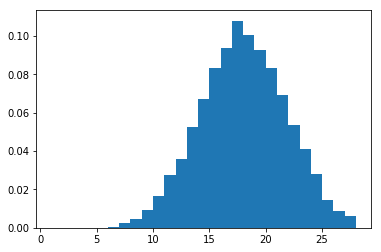

In [6]:
trials = 10000
test_rolls = [0] * trials
for i in range(trials):
    test_rolls[i] = np.sum(simple_roll('5d6'))
    
bins = np.arange(1, np.max(test_rolls))
plt.hist(test_rolls, bins=bins, density=True)
print("Mean: " + str(np.mean(test_rolls)))

TODO: explain keep notation

In [7]:
x = '4d6k3'
x.split('k')

['4d6', '3']

In [8]:
rolls = simple_roll('9d6')
rolls
x = np.partition(rolls, 4)
print(x)
x[-4:]

[1 1 2 2 3 5 5 6 6]


array([5, 5, 6, 6])

In [9]:
def keep_dice(dice):
    '''docstring'''
    base_roll, keep = dice.split('k')
    keep = int(keep)
    rolls = simple_roll(base_roll)
    #link to stack exchange for partition
    kept_rolls = np.partition(rolls, keep)[-keep:]
    return kept_rolls

In [10]:
keep_dice('4d6k3')

array([3, 3, 3])

Mean: 12.0872


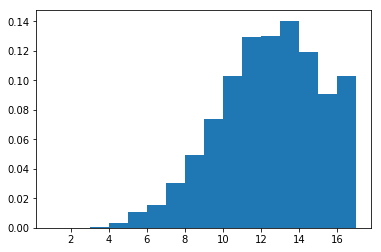

In [11]:
trials = 10000
test_rolls = [0] * trials
for i in range(trials):
    test_rolls[i] = np.sum(keep_dice('4d6k3'))
    
bins = np.arange(1, np.max(test_rolls))
plt.hist(test_rolls, bins=bins, density=True)
print("Mean: " + str(np.mean(test_rolls)))

- more complicated scenarios
- error checking

explain regular expression

In [12]:
x = re.search(r'(\d+)d(\d+)','5d6')
x.groups()

('5', '6')

In [13]:
dice_expr = r'(\d+)d(\d+)'
keep_expr = dice_expr + 'k(\d+)'
explode_expr = '(' + dice_expr + '|' + keep_expr + ')!'

In [14]:
x = re.compile(dice_expr)

In [15]:
help(x.fullmatch)

Help on built-in function fullmatch:

fullmatch(string=None, pos=0, endpos=9223372036854775807, *, pattern=None) method of _sre.SRE_Pattern instance
    Matches against all of the string



In [16]:
test_cases = {
    '5d6' : 'dice',
    '5dd6' : 'invalid',
    '90d1' : 'dice',
    '4d6k3' : 'keep',
    '4d6!' : 'explode',
    '9k3' : 'invalid',
    'lol' : 'invalid',
    '4d6k3!' : 'explode',
    '2d20k1' : 'keep'
}

In [17]:
dice_re = re.compile(dice_expr)
for dice, answer in test_cases.items():
    match = dice_re.fullmatch(dice)
    if match is not None and answer == 'dice':
        print('Good ' + dice)
    elif match is None and answer != 'dice':
        print('Good ' + dice)
    else:
        print('Bad  ' + dice)

Good 9k3
Good 5d6
Good 90d1
Good 5dd6
Good lol
Good 4d6k3!
Good 4d6k3
Good 4d6!
Good 2d20k1


In [18]:
regex = re.compile(keep_expr)
expected_answer = 'keep'

for dice, answer in test_cases.items():
    match = regex.fullmatch(dice)
    if match is not None and answer == expected_answer:
        print('Good ' + dice)
    elif match is None and answer != expected_answer:
        print('Good ' + dice)
    else:
        print('Bad  ' + dice)
        
        
regex = re.compile(explode_expr)
expected_answer = 'explode'

for dice, answer in test_cases.items():
    match = regex.fullmatch(dice)
    if match is not None and answer == expected_answer:
        print('Good ' + dice)
    elif match is None and answer != expected_answer:
        print('Good ' + dice)
    else:
        print('Bad  ' + dice)

Good 9k3
Good 5d6
Good 90d1
Good 5dd6
Good lol
Good 4d6k3!
Good 4d6k3
Good 4d6!
Good 2d20k1
Good 9k3
Good 5d6
Good 90d1
Good 5dd6
Good lol
Good 4d6k3!
Good 4d6k3
Good 4d6!
Good 2d20k1


In [56]:
def roll_dice(number, sides, keep=None, explode=False):
    '''docstring'''
    
    if number == 0:
        return []
    
    rolls = np.random.randint(1,sides+1,number)
    
    if explode: #roll additional dice for highest values
        num_max = np.sum(rolls == sides)
        rolls = np.append(rolls, 
                         roll_dice(num_max, sides, keep=None, explode=explode))
        
    if keep is not None:
        rolls = np.partition(rolls, keep)[-keep:]
        
    return rolls

def regex_roll(dice, keep=None, explode=False):
    '''docstring'''
    dice_expr = r'(\d+)d(\d+)'
    keep_expr = '(' + dice_expr + ')' + 'k(\d+)'
    explode_expr = '(' + dice_expr + '|' + keep_expr + ')!'
    
    explode_re = re.compile(explode_expr)
    match = explode_re.fullmatch(dice)
    
    if match is not None: # exploding dice roll
        return regex_roll(match.group(1), explode=True)
    
    keep_re = re.compile(keep_expr)
    match = keep_re.fullmatch(dice)
    
    if match is not None: #keep dice
        keep = int(match.groups()[3])
        dice = match.groups()[0]
        return regex_roll(dice, keep=keep, explode=explode)
    
    dice_re = re.compile(dice_expr)
    match = dice_re.fullmatch(dice)
    
    if match is None:
        raise ValueError('Invalid dice notation: ' + dice)
    
    number, sides = map(int, match.groups())
    
    return roll_dice(number, sides, keep, explode)

In [64]:
regex_roll('4d6!')

array([5., 1., 5., 6., 2.])

get crazy

- parse tree